## Final Project Submission

Please fill out:
* Student name: Aaron Feinberg 
* Student pace: self paced 
* Scheduled project review date/time: 8/11/2019
* Instructor name: Eli Thomas 
* Blog post URL:


# 1. Understanding Data

In [2]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import plotly as py
import plotly.graph_objs as go
import matplotlib.dates as mdates
from scipy import stats
import numpy as np

df = pd.read_csv("kc_house_data.csv")
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0      5650     1.0         NaN   0.0     ...          7        1180   
1      7242     2.0         0.0   0.0     ...          7        2170   
2     10000     1.0         0.0   0.0     ...          6         770   
3      5000     1.0         0.0   0.0     ...          7        1050   
4      8080     1.0         0.0   0.0     ...          8        1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

In [3]:
df.describe()
#Price is the target

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

In [4]:
df.shape

(21597, 21)

At First Glance:
    1)Price has large standard deviation. Cheapest at $78,000 and most expensive at $7,700,000
    2)We are dealing with 21,597 unique homes 
    3)Square footage of home vs. Square footage of the lot size. Standard deviation of lot is much larger than home sizes. Which implies there are more urban areas.
    4)Can use neighbor information to look into neighbor statistics. 
     


# 2. Clean Data

## Correcting dtypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


### Sqft_basement

Sqft_basement is an object. Let's see why... 


In [6]:
df['sqft_basement'].value_counts(normalize = True).head()

0.0      0.593879
?        0.021021
600.0    0.010048
500.0    0.009677
700.0    0.009631
Name: sqft_basement, dtype: float64

the '?' only accounts for 2% of the data. Let's remove it. 


In [7]:
df['sqft_basement'] = (df['sqft_basement'].replace('?', 0)).astype('float64')

Turning from object into float now that we have gotten rid of '?'


In [8]:
df['sqft_basement'].astype(float, inplace=True).head(1)

0    0.0
Name: sqft_basement, dtype: float64

## Missing Values

In [9]:
df.isna().sum()
#shows you the number of NaN

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### 1. Waterfront

In [10]:
df['waterfront'].head()


0    NaN
1    0.0
2    0.0
3    0.0
4    0.0
Name: waterfront, dtype: float64

Waterfront is binary. Either has a water front view or doesnt. 

In [11]:
average_price_wf = df.loc[df["waterfront"]==1, ["price"]].head()
average_price_wf.mean()


price    1570980.0
dtype: float64

Mean price of properties with a water front is $1,520,980. Double the mean of all properties (540K). So clearly has an effect on the target

In [12]:
df['waterfront'].value_counts(normalize=True)

0.0    0.992404
1.0    0.007596
Name: waterfront, dtype: float64

Proportionally significantly more 0's than 1's. Going to turn the rest of the missing waterfront values into 0's.

In [13]:
df['waterfront'].fillna(df['waterfront'].median(), inplace=True)

### 2. Views

Only 63 missing values. Going to drop these missing values

In [14]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [15]:
df.dropna(how = 'any', subset = ['view'], inplace = True, axis = 0)

In [16]:
df.view.isna().sum()

0

In [17]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3830
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### 3. Year Renovated 

In [18]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

(0, 8000000)

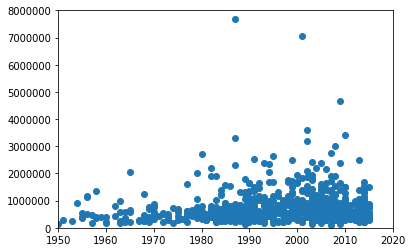

In [19]:
#For year renovated. Let's look at it's relationship to price, and then potentially bin the data by every 10 years (1,2,3,4,5)
y = df['price']
x = df['yr_renovated']
plt.scatter(x, y)
plt.xlim(1950, 2020)
plt.ylim(0, 8000000)

In [20]:
df['yr_renovated'].value_counts().head()


0.0       16961
2014.0       73
2003.0       31
2013.0       31
2007.0       30
Name: yr_renovated, dtype: int64

Clearly there is an upwards trend on houses being renovated overtime, but there are nearly 17,000 houses that were never renovated along with 3,0000 houses with missing values. This column is a bit unpredicated due to large majority never getting renovated, along with missing values. GOing to remove.  

In [21]:
df.drop('yr_renovated', axis=1, inplace = True)

Dropped year rennovation due to lack of correlation to the target, missing data and 17,000 houses not renovated

## Checking for Duplicates

In [22]:
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


Empty DataFrame
Columns: [id, date, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, zipcode, lat, long, sqft_living15, sqft_lot15]
Index: []

No duplicates

# 3. Exploratory Data Analysis

The Purpose of this is to understand the data anad how it relates to price. Will help in determining how I want to manipulate the data moving forward

When I think about determining how to maximize the profit of someones home, I think about what is the most efficient way to renovate the home so they can sell it a higher price. The underlying question here is "Where should we invest in our home, to reap benefits and sell at a higher price"

### Grade

Q: Should we renovate the bones of our house to get a higher building grade?

A: Yes, there is an obvious increase in prices of a home through grade. Do whatever we can to increase the Grade

Text(0, 0.5, 'Price')

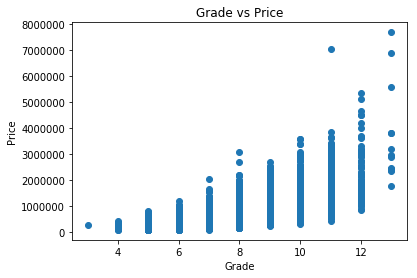

In [23]:
plt.scatter(df.grade, df.price)
plt.title('Grade vs Price')
plt.xlabel('Grade')
plt.ylabel('Price')

In [24]:
grade_value = [3,4,5,6,7,8,9,10,11,12]

for i in grade_value:
    avg_price = df.loc[df["grade"]==i, ["price"]]
    print(f"{i} grade:", avg_price.mean())

3 grade: price    262000.0
dtype: float64
4 grade: price    212001.851852
dtype: float64
5 grade: price    248523.971074
dtype: float64
6 grade: price    301894.643525
dtype: float64
7 grade: price    402562.153107
dtype: float64
8 grade: price    543063.975219
dtype: float64
9 grade: price    774262.782642
dtype: float64
10 grade: price    1.072211e+06
dtype: float64
11 grade: price    1.496950e+06
dtype: float64
12 grade: price    2.167330e+06
dtype: float64


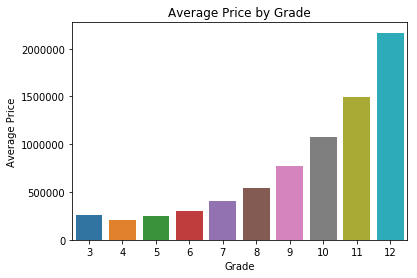

In [25]:
avg_prices = []

for grade in grade_value:
    avg_price = df[df.grade==grade].price.mean()
    avg_prices.append(avg_price)

sns.barplot(grade_value, avg_prices)
plt.xlabel('Grade')
plt.ylabel('Average Price')
plt.title('Average Price by Grade')
plt.show()

### Condition

Q: Cost benefit analysis of improving condiditon of house

A: Increasing two levels in house condition can lead to major value. 

Text(0, 0.5, 'Price')

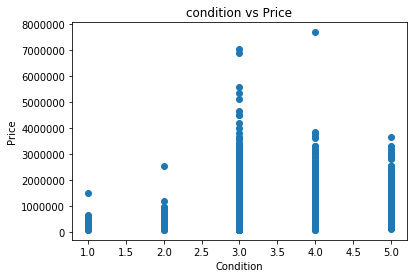

In [26]:
plt.scatter(df.condition, df.price)
plt.title('condition vs Price')
plt.xlabel('Condition')
plt.ylabel('Price')

In [27]:
condition_value = [1,2,3,4,5]

for i in condition_value:
    avg_price = df.loc[df["condition"]==i, ["price"]]
    print(f"{i} Condition:", avg_price.mean())

1 Condition: price    341067.241379
dtype: float64
2 Condition: price    328178.758824
dtype: float64
3 Condition: price    542226.410772
dtype: float64
4 Condition: price    520432.244122
dtype: float64
5 Condition: price    612237.913966
dtype: float64


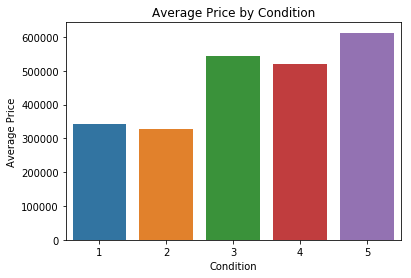

In [28]:
avg_prices = []

for condition in condition_value:
    avg_price = df[df.condition==condition].price.mean()
    avg_prices.append(avg_price)

sns.barplot(condition_value, avg_prices)
plt.xlabel('Condition')
plt.ylabel('Average Price')
plt.title('Average Price by Condition')
plt.show()

Reflection: Average price of a condition 1 house is greater than 2, and 3 is higher than 4. Skipping every two grades of condition can make a significant difference in house. Houses at grade 2 and 4 should look to make the next jump up. 

### Longitude || Latitude 

Q: Will your location affect the price of your home?

A: Locations that are centered nearer to lake washington, and in the hearts of Medina, Denny Blaine and Moorland areof higher price

In [29]:
py.offline.init_notebook_mode(connected = True)

mapbox_access_token = 'pk.eyJ1IjoiYWZlaW4iLCJhIjoiY2swcTRudGx6MDRxZTNucnBqMmZybTNkdyJ9.v7G988CZnWLCUkMnIs2zHQ'

In [30]:
home_lat = df['lat']
home_lon = df['long']

data = [go.Scattermapbox(lat = home_lat, lon = home_lon,
                         mode = 'markers',
                         marker = dict(size = 2.55, opacity = 0.5, 
                                       color = df['price'],
                                       colorbar = dict(title = 'Price (million)'),
                                       colorscale = 'Jet'),
                         text = df['price'])]
                      
layout = go.Layout(title = 'Home prices in King County, WA',
                   autosize = True,
                   hovermode = 'closest',
                   showlegend = False,
                   mapbox = dict(accesstoken = mapbox_access_token,
                                 bearing = 0,
                                 center = dict(lat = 47.61, lon = -122.2),
                                 pitch = 0,
                                 zoom = 9.5,
                                 style = 'light'))
fig = dict(data = data, layout = layout)
py.offline.iplot(fig)

Reflection: "location, location, location" matters here. The more expensive houses are denley compacted between the Evergreen and Homer Bridges along the coastline of Lake Washington. This is useful information to determine what the going rates of homes look like in your neighboorhood.

### Sqft_Basement 

Q: Is adding a basement valuable? At what cost is it worth adding a basement to add value to our home?

A: If you already have a basement -- For every 500 square feet you add, you will see a 300k+ increase in the price of your home. 

Text(0, 0.5, 'Price')

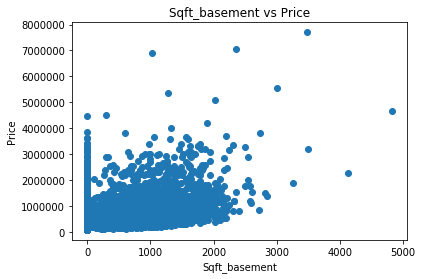

In [30]:
plt.scatter(df.sqft_basement, df.price)
plt.title('Sqft_basement vs Price')
plt.xlabel('Sqft_basement')
plt.ylabel('Price')

In [32]:
bins = [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

df['binned'] = pd.cut(df['sqft_basement'], bins)

df[['binned','price']].groupby(['binned']).mean()

price
binned                    
(500, 1000]   5.887300e+05
(1000, 1500]  7.762371e+05
(1500, 2000]  1.209180e+06
(2000, 2500]  1.508175e+06
(2500, 3000]  2.148182e+06
(3000, 3500]  4.266667e+06
(3500, 4000]           NaN
(4000, 4500]  2.280000e+06
(4500, 5000]  4.670000e+06

In [33]:
df.loc[df["sqft_basement"]==0, ["price"]].mean()

price    488661.268151
dtype: float64

Reflection: Consider the expense of the adding 500 sqft to your basement. If it is less than 300k you will likely see long term benefits when selling your house. The average price of a home shoots up automatically by 100k by adding a basement. If you can add one for less, it is likely going to be a good investment. 

### Sqft_Above

Q: Value of adding sqft_above?

A: Higher increase to value of property than basement. Also much stronger correlation of Grade, which has a more direct impact on price.

Text(0, 0.5, 'Price')

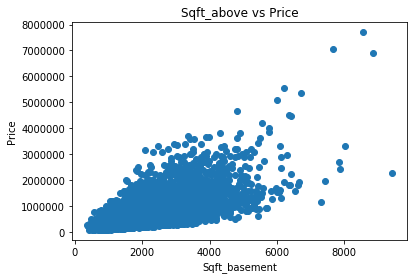

In [36]:
plt.scatter(df.sqft_above, df.price)
plt.title('Sqft_above vs Price')
plt.xlabel('Sqft_basement')
plt.ylabel('Price')

In [38]:
bins = [500, 1500, 2500, 3500, 4500, 5500]

df['binned'] = pd.cut(df['sqft_above'], bins)

df[['binned','price']].groupby(['binned']).mean()

price
binned                    
(500, 1500]   3.930531e+05
(1500, 2500]  5.500470e+05
(2500, 3500]  7.774393e+05
(3500, 4500]  1.183679e+06
(4500, 5500]  1.693836e+06

Reflection: Increasing by 1,000 sqft leads to price value increases of 200k +. That's 200 dollars per square foot. If we can build for cheaper, it may be a good investment. The average construction cost to build a home in King county is $150/ sq foot.

### Waterfront

Waterfront isn't as applicable to our target segment. Either you have a waterfront home, or you don't. Not much you can do to change this.

Text(0, 0.5, 'Price')

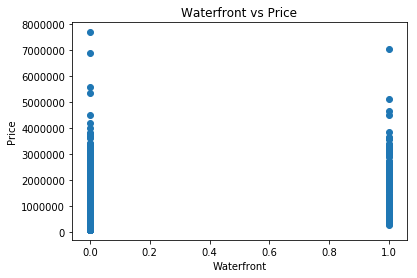

In [39]:
plt.scatter(df.waterfront, df.price)
plt.title('Waterfront vs Price')
plt.xlabel('Waterfront')
plt.ylabel('Price')

In [40]:
df.groupby('waterfront').mean()

id         price  bedrooms  bathrooms  sqft_living  \
waterfront                                                                 
0.0         4.583360e+09  5.322450e+05  3.373323   2.111845  2072.124410   
1.0         4.433564e+09  1.692506e+06  3.331034   2.686207  3216.165517   

                sqft_lot    floors      view  condition     grade  \
waterfront                                                          
0.0         15017.466081  1.493221  0.209781   3.408855  7.649586   
1.0         25878.068966  1.627586  3.786207   3.537931  8.813793   

             sqft_above  sqft_basement     yr_built       zipcode        lat  \
waterfront                                                                     
0.0         1783.791622     282.317359  1971.062743  98077.809435  47.560320   
1.0         2491.579310     717.000000  1962.082759  98097.103448  47.539515   

                  long  sqft_living15    sqft_lot15  
waterfront                                           
0.0        -122.213510    1981.654589  12682.401468  
1.0        -122.278634    2671.537931  22881.800000

Reflection: Waterfront properties generally have much more living and lot space. Their basements are 3 times the size. Neighbors houses are much larger as well.

### Bedrooms

Q: How valuable are additional bedrooms? 

A: Interestingly you don't see too much correlaton between grade and bedrooms. Not something I would reccomend when trying to increase the value of your home.

Text(0, 0.5, 'Price')

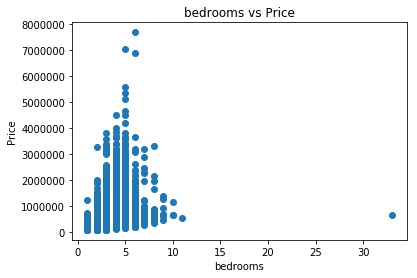

In [41]:
plt.scatter(df.bedrooms, df.price)
plt.title('bedrooms vs Price')
plt.xlabel('bedrooms')
plt.ylabel('Price')

Reflection: Not worth reccomending an increase in bedroom renovation to ultimately increase grade.

### Bathrooms

Q: Value of adding bathrooms to your home?

A: A clear differentiator when it comes to Grade. As long as it costs below 100k to add the bathroom it is worth it to renovate and add. 

Text(0, 0.5, 'Price')

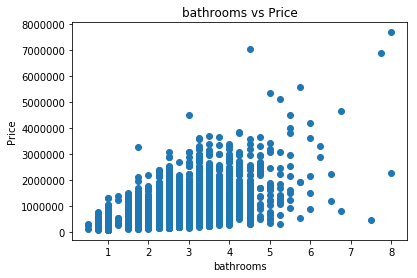

In [46]:
plt.scatter(df.bathrooms, df.price)
plt.title('bathrooms vs Price')
plt.xlabel('bathrooms')
plt.ylabel('Price')

In [47]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 2.5 , 1.75, 2.75, 1.5 , 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 0.5 , 5.5 , 6.75,
       6.  , 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

Upwards correlation. The more bathrooms, the merrier.

Determine on average how much an extra bathroom costs:

In [49]:
num_bathrooms = [1,2,3,4,5,6,8]

for i in num_bathrooms:
    avg_price = df.loc[df["bathrooms"]==i, ["price"]]
    print(f"{i} Bathroom:", avg_price.mean())

1 Bathroom: price    347054.175475
dtype: float64
2 Bathroom: price    457959.349429
dtype: float64
3 Bathroom: price    709006.662234
dtype: float64
4 Bathroom: price    1.268405e+06
dtype: float64
5 Bathroom: price    1.674167e+06
dtype: float64
6 Bathroom: price    2478000.0
dtype: float64
8 Bathroom: price    4990000.0
dtype: float64


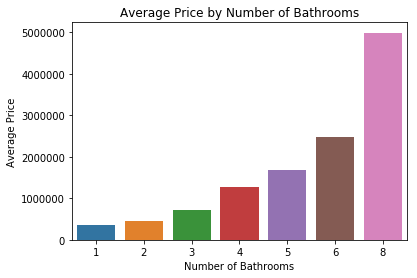

In [50]:
bathroom_counts = [1,2,3,4,5,6,8]
avg_prices = []

for bathrooms in bathroom_counts:
    avg_price = df[df.bathrooms==bathrooms].price.mean()
    avg_prices.append(avg_price)

sns.barplot(bathroom_counts, avg_prices)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Price')
plt.title('Average Price by Number of Bathrooms')
plt.show()

Clear bathroom price trend for Grade and average price increase. 

### Sqft Living

Q: How much should we spend on additional sqft_living to maximize value on selling a home?

A: The largest impact on selling a home. 

Text(0, 0.5, 'Price')

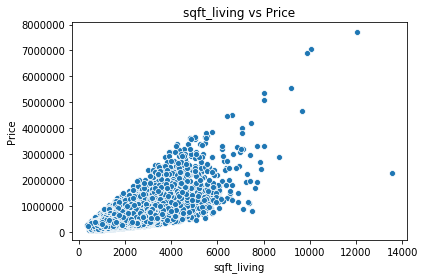

In [33]:
sns.scatterplot(df.sqft_living, df.price, style = )
plt.title('sqft_living vs Price')
plt.xlabel('sqft_living')
plt.ylabel('Price')

In [58]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000]

df['binned'] = pd.cut(df['sqft_basement'], bins)

df[['binned','price']].groupby(['binned']).mean()

price
binned                    
(0, 500]      4.923488e+05
(500, 1000]   5.887300e+05
(1000, 1500]  7.762371e+05
(1500, 2000]  1.209180e+06
(2000, 2500]  1.508175e+06
(2500, 3000]  2.148182e+06
(3000, 3500]  4.266667e+06
(3500, 4000]           NaN
(4000, 4500]  2.280000e+06
(4500, 5000]  4.670000e+06

Reflection: Adding 500 additional square feet can signicantly increase the value of your house. Especially smaller-mid sized homes up to 3500 sqft. 

### Sqft Lot

Q: Should we get more land?

A: Not as profitable as housing sqft. This is likely because location is such a huge factor. 

Text(0, 0.5, 'Price')

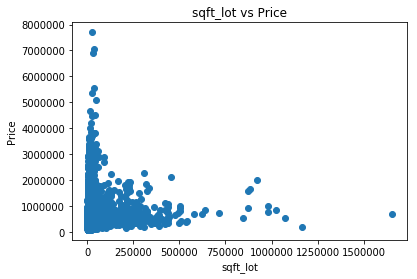

In [59]:
plt.scatter(df.sqft_lot, df.price)
plt.title('sqft_lot vs Price')
plt.xlabel('sqft_lot')
plt.ylabel('Price')

Reflection: Not much to report here. More of a non factor in price of home.

### Floors

Q: Should we add additonal floors to the home?

A: Not much of a correlation to price. Houses with 2 floors have just as high grades as houses with 3.5

Text(0, 0.5, 'Price')

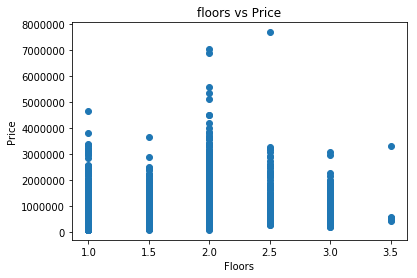

In [61]:
plt.scatter(df.floors, df.price)
plt.title('floors vs Price')
plt.xlabel('Floors')
plt.ylabel('Price')

In [63]:
num_floors = [1,1.5,2,2.5,3,3.5]

for i in num_floors:
    avg_price = df.loc[df["floors"]==i, ["price"]]
    print(f"{i} Floor:", avg_price.mean())


1 Floor: price    442275.305459
dtype: float64
1.5 Floor: price    559082.98371
dtype: float64
2 Floor: price    648921.783218
dtype: float64
2.5 Floor: price    1.052732e+06
dtype: float64
3 Floor: price    583433.898527
dtype: float64
3.5 Floor: price    910214.285714
dtype: float64


Reflection: More Floors doesn't necessarily mean a more expensive house. Somewhere in the middle range 2-2.5 floors is the sweetspot on price. 

### Views

Hard to determine what view really means. Not going to use in reporting

Text(0, 0.5, 'Price')

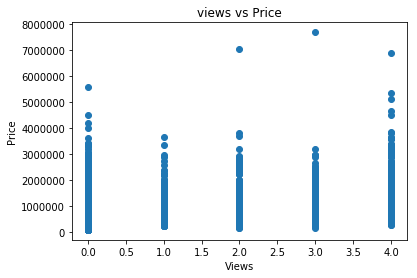

In [64]:
plt.scatter(df.view, df.price,)
plt.title('views vs Price')
plt.xlabel('Views')
plt.ylabel('Price')

### Zipcode

Text(0, 0.5, 'Price')

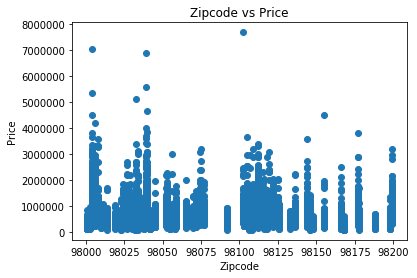

In [65]:
plt.scatter(df.zipcode, df.price)
plt.title('Zipcode vs Price')
plt.xlabel('Zipcode')
plt.ylabel('Price')

Similar to location. Can use geo map to label whatever findings I see with zipcode

### Sqft_Living15

Text(0, 0.5, 'Price')

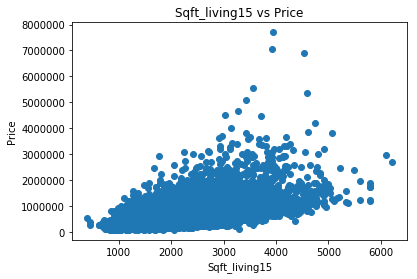

In [66]:
plt.scatter(df.sqft_living15, df.price)
plt.title('Sqft_living15 vs Price')
plt.xlabel('Sqft_living15')
plt.ylabel('Price')

Reflection: Neighbors aren't likely to influence whether or not I renovate. Sqft_living of the actual home has a higher correlation.

### Sqft_Lot15

Text(0, 0.5, 'Price')

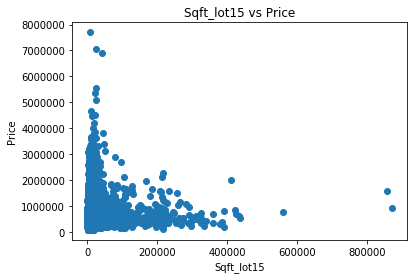

In [67]:
plt.scatter(df.sqft_lot15, df.price)
plt.title('Sqft_lot15 vs Price')
plt.xlabel('Sqft_lot15')
plt.ylabel('Price')

Reflection: Neighbors aren't likely to influence whether or not I renovate. Sqft_lot of my the actual home barely has an influence on the price

### Multicolinearity 

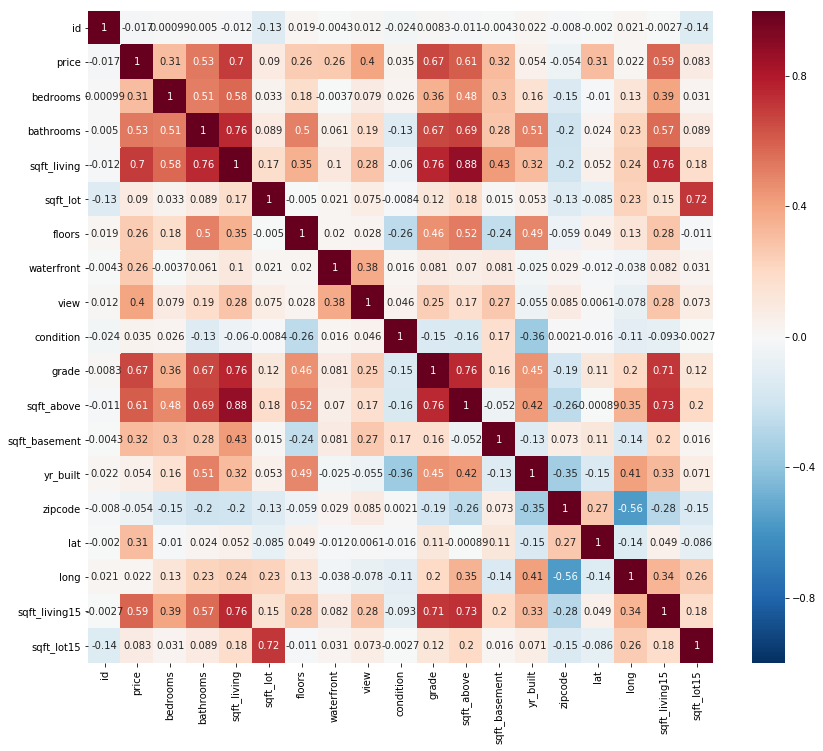

In [68]:
correlation = df.corr()
plt.figure(figsize=(14, 12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

Id and date has no correlation to variables. An obvious remove

In [69]:
df.drop('id', axis=1, inplace = True)
df.drop('date', axis=1, inplace = True)
df.drop('binned', axis=1, inplace = True)

Seems to be a strong coorelation between Sqft_above and Sqft_living (.88). Logical to remove one of these. Going to remove sqft_above, because sqft_living is more correlated with the target

In [70]:
df.drop('sqft_above', axis=1, inplace=True)

# 4. Inital Model Train/Test

After our first test it looks like we are running with an accuracy of 70%. Let's make some changes to see if we can bump that up! 

In [71]:
from sklearn.model_selection import train_test_split
trainset = df.drop('price', axis = 1)
testset = df[['price']]
trainset_train, trainset_test, testset_train, testset_test = train_test_split(trainset, testset, test_size = 0.25, random_state=10)

In [72]:
# checking the MSE 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

linreg = LinearRegression()
linreg.fit(trainset_train, testset_train)
yhat_train = linreg.predict(trainset_train)

lm = LinearRegression()

# calculating the MSE
train_mse = mean_squared_error(testset_train, yhat_train)
print('MSE: ', train_mse)

MSE:  40660394144.812935


In [73]:
# calculating the OLS
import statsmodels.api as sm
from statsmodels.formula.api import ols

predictors_int = sm.add_constant(trainset_train)
model = sm.OLS(testset_train, predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2355.
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:02:41   Log-Likelihood:            -2.2018e+05
No. Observations:               16150   AIC:                         4.404e+05
Df Residuals:                   16133   BIC:                         4.405e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           9.42e+06   3.39e+06      2.777      0.005    2.77e+06    1.61e+07
bedrooms       -3.55e+04   2186.467    -16.237      0.000   -3.98e+04   -3.12e+04
bathrooms      4.354e+04   3775.846     11.530      0.000    3.61e+04    5.09e+04
sqft_living     178.6841      4.253     42.017      0.000     170.348     187.020
sqft_lot          0.1351      0.057      2.368      0.018       0.023       0.247
floors         7464.9817   4146.161      1.800      0.072    -661.955    1.56e+04
waterfront     5.876e+05    2.1e+04     28.002      0.000    5.46e+05    6.29e+05
view           5.483e+04   2431.660     22.547      0.000    5.01e+04    5.96e+04
condition      2.258e+04   2680.741      8.421      0.000    1.73e+04    2.78e+04
grade          9.838e+04   2501.036     39.336      0.000    9.35e+04    1.03e+05
sqft_basement   -31.1745      4.995     -6.242      0.000     -40.965     -21.384
yr_built      -2804.0608     80.277    -34.930      0.000   -2961.412   -2646.709
zipcode        -612.6311     38.298    -15.997      0.000    -687.699    -537.564
lat            6.013e+05   1.24e+04     48.381      0.000    5.77e+05    6.26e+05
long          -2.201e+05   1.53e+04    -14.406      0.000    -2.5e+05    -1.9e+05
sqft_living15    25.0613      3.991      6.279      0.000      17.238      32.885
sqft_lot15       -0.3425      0.085     -4.033      0.000      -0.509      -0.176
==============================================================================
Omnibus:                    14181.720   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1633565.550
Skew:                           3.716   Prob(JB):                         0.00
Kurtosis:                      51.707   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Remove P Values > .05

First let's remove that are greater than .5 becuase the changes in these predictor are not associated with changes in the target. 

In [74]:
df.drop('floors', axis=1, inplace = True)


Floors 

### Log Transform

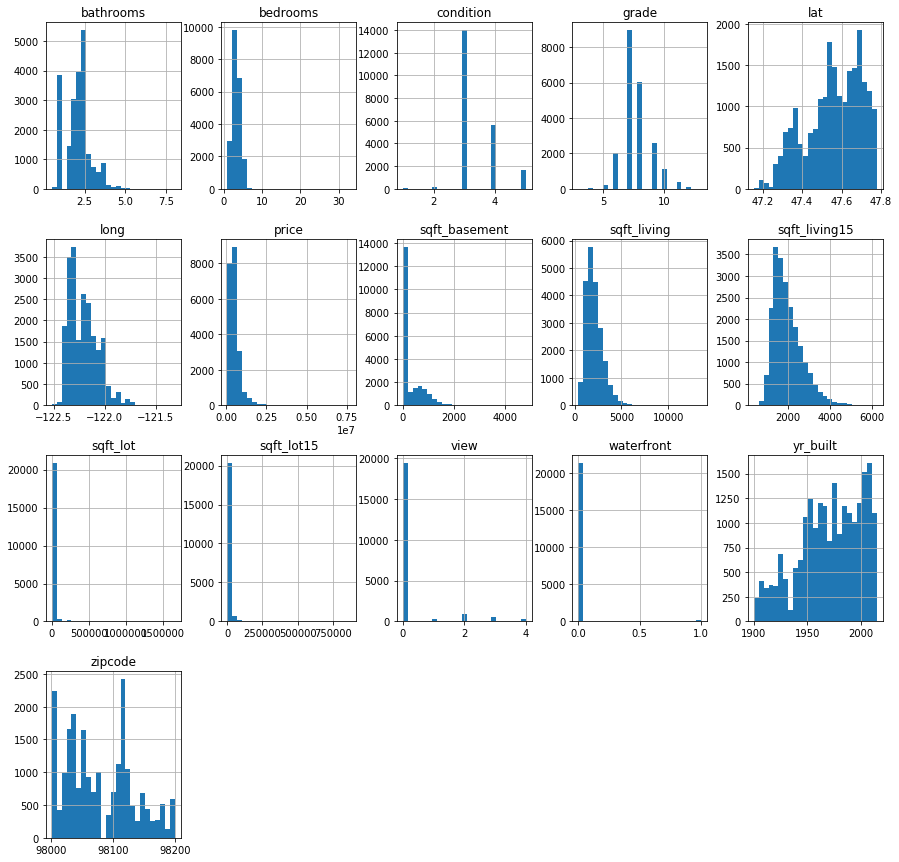

In [75]:
distribution_list = df.hist(bins=25, layout=(4,5), figsize=(15,15))

Applying log on non-normal looking variables and seeing testing how the model performs. 

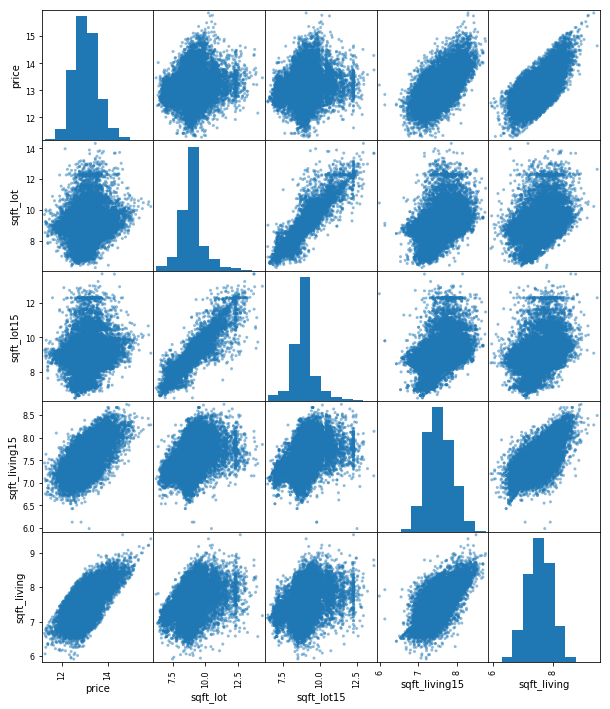

In [76]:
non_normal = ['price', 'sqft_lot', 'sqft_lot15', 'sqft_living15', 'sqft_living']
for feat in non_normal:
    df[feat] = df[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df[non_normal], figsize=(10,12));

After these changes, we have moved our model certainty up 7%. We have decreased our skew, kurtosis and JB scores significantly! 

In [78]:
from sklearn.model_selection import train_test_split
trainset = df.drop('price', axis = 1)
testset = df[['price']]
trainset_train, trainset_test, testset_train, testset_test = train_test_split(trainset, testset, test_size = 0.25, random_state=10)

In [79]:
# checking the MSE 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

linreg = LinearRegression()
linreg.fit(trainset_train, testset_train)
yhat_train = linreg.predict(trainset_train)

lm = LinearRegression()

# calculating the MSE
train_mse = mean_squared_error(testset_train, yhat_train)
print('MSE: ', train_mse)

MSE:  0.06341352415749814


In [80]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

predictors_int = sm.add_constant(trainset_train)
model = sm.OLS(testset_train, predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     3642.
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:05:26   Log-Likelihood:                -644.38
No. Observations:               16150   AIC:                             1321.
Df Residuals:                   16134   BIC:                             1444.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -2.7154      4.310     -0.630      0.529     -11.164       5.733
bedrooms         -0.0261      0.003     -9.265      0.000      -0.032      -0.021
bathrooms         0.0812      0.005     17.715      0.000       0.072       0.090
sqft_living       0.3585      0.011     31.417      0.000       0.336       0.381
sqft_lot          0.0101      0.006      1.767      0.077      -0.001       0.021
waterfront        0.4133      0.026     15.765      0.000       0.362       0.465
view              0.0722      0.003     23.840      0.000       0.066       0.078
condition         0.0488      0.003     14.611      0.000       0.042       0.055
grade             0.1722      0.003     58.124      0.000       0.166       0.178
sqft_basement -2.599e-05   5.58e-06     -4.656      0.000   -3.69e-05    -1.5e-05
yr_built         -0.0039   9.85e-05    -39.424      0.000      -0.004      -0.004
zipcode          -0.0006   4.78e-05    -12.476      0.000      -0.001      -0.001
lat               1.3809      0.016     88.589      0.000       1.350       1.411
long             -0.0875      0.019     -4.519      0.000      -0.125      -0.050
sqft_living15     0.2037      0.010     19.945      0.000       0.184       0.224
sqft_lot15       -0.0462      0.006     -7.370      0.000      -0.059      -0.034
==============================================================================
Omnibus:                      268.282   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              461.271
Skew:                           0.133   Prob(JB):                    6.86e-101
Kurtosis:                       3.784   Cond. No.                     2.13e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.13e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One more P Score drop for Sqft_lot.

In [81]:
df.drop('sqft_lot', axis=1, inplace = True)

In [82]:
from sklearn.model_selection import train_test_split
trainset = df.drop('price', axis = 1)
testset = df[['price']]
trainset_train, trainset_test, testset_train, testset_test = train_test_split(trainset, testset, test_size = 0.25, random_state=10)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

linreg = LinearRegression()
linreg.fit(trainset_train, testset_train)
yhat_train = linreg.predict(trainset_train)

lm = LinearRegression()

# calculating the MSE
train_mse = mean_squared_error(testset_train, yhat_train)
print('MSE: ', train_mse)

MSE:  0.06342578975782914


In [84]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

predictors_int = sm.add_constant(trainset_train)
model = sm.OLS(testset_train, predictors_int.astype(float)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     3901.
Date:                Sun, 06 Oct 2019   Prob (F-statistic):               0.00
Time:                        14:06:28   Log-Likelihood:                -645.94
No. Observations:               16150   AIC:                             1322.
Df Residuals:                   16135   BIC:                             1437.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -1.9249      4.287     -0.449      0.653     -10.328       6.479
bedrooms         -0.0261      0.003     -9.262      0.000      -0.032      -0.021
bathrooms         0.0808      0.005     17.656      0.000       0.072       0.090
sqft_living       0.3612      0.011     31.939      0.000       0.339       0.383
waterfront        0.4129      0.026     15.749      0.000       0.362       0.464
view              0.0723      0.003     23.868      0.000       0.066       0.078
condition         0.0486      0.003     14.550      0.000       0.042       0.055
grade             0.1721      0.003     58.103      0.000       0.166       0.178
sqft_basement -2.619e-05   5.58e-06     -4.694      0.000   -3.71e-05   -1.53e-05
yr_built         -0.0039   9.77e-05    -40.012      0.000      -0.004      -0.004
zipcode          -0.0006   4.77e-05    -12.548      0.000      -0.001      -0.001
lat               1.3793      0.016     88.622      0.000       1.349       1.410
long             -0.0844      0.019     -4.377      0.000      -0.122      -0.047
sqft_living15     0.2029      0.010     19.885      0.000       0.183       0.223
sqft_lot15       -0.0364      0.003    -12.359      0.000      -0.042      -0.031
==============================================================================
Omnibus:                      272.190   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              468.166
Skew:                           0.136   Prob(JB):                    2.18e-102
Kurtosis:                       3.789   Cond. No.                     2.12e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [85]:
df.shape

(21534, 15)